In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [65]:
#reading in file
df = pd.read_csv('annotations_data.csv')

In [66]:
#for me to keep track of how many classification articles I currently have
#to be removed later
df_true = df[df['Is the article accurately labelled as classification?'] == 'Yes']
len(df_true)

63

In [67]:
#df_true.head()

In [68]:
def count_answers(word_list, column):
#initialising the dictionary with the known answers
    method_dic = {}
    for word in word_list:
        method_dic[word.lower()] = 0

    for method in column:
        options = method.split(", ") #this also splits other answers with ,  
        for option in options:
            option = option.lower()
            if option not in method_dic: #checks if it is a different answer           
                method_dic[option] = 1
                break #ensures that even if the other answer has a , in it, it is only counted once    
            else: 
                method_dic[option] = method_dic.get(option)+1
   
    #adding a threshold, so only options with more than XX answer are seperately visualised, the rest are gathered
    #in the other category
    final_dic = {}
    final_dic['other'] = 0
    for key in method_dic.keys(): #deleting the option if only one article uses it and count it as other instead
        if method_dic.get(key) > 1: #playing around with the threshold
            final_dic[key] = method_dic.get(key)
        else: 
            final_dic['other'] = final_dic.get('other')+1
        #maybe a niche case where other is never used? but probably not an issue
    return final_dic

In [69]:

word_list = ['SVM', 'Graph analysis', 'Supervised learning', 'Unsupervised learning', 'Transfer learning', 'Neural network', 'bag of features','multiple kernel learning','Other']


In [70]:

perf_list = ['AUC', 'Specificity', 'Accuracy', 'Recall', 'F1 score', 'Sensitivity', 'mean', 'median', 'standard deviation', 'matthews correlation coefficient', 'Other']


In [159]:
def create_viz(df, word_list, column, name, count_option):
    #narrowing down the df to classification labelled accurately and splitting into 2012 and 2021
    df_true = df[df['Is the article accurately labelled as classification?'] == 'Yes']
    df_2012 = df_true[df_true['Which year is the article from?'] == 2012]
    df_2021 = df_true[df_true['Which year is the article from?'] == 2021]
    
    #counting the answers 
    if count_option == 'multiple choice':
        data = {'2012': count_answers(word_list, df_2012.iloc[:, column]),
       '2021': count_answers(word_list, df_2021.iloc[:, column])}
        df = pd.DataFrame.from_dict(data)

    elif count_option == 'y/n':
        data = {'2012': count_yes_no(df_2012, column),
       '2021': count_yes_no(df_2021, column)}
        
        df = pd.DataFrame.from_dict(data)
        if name == 'Dataset type':
            row_names = {0:"Public", 1:"Private"}
        else: row_names = {0:"Yes", 1:"No"} 
        
        df.rename(index= row_names, inplace=True)   
        
    color_dic = {'2012': '#066570', '2021': '#5eb1bf'}
    
    #drawing the figure with a helper function
    if 'used' in name:
        draw_fig(df, 'barh', name, False, color_dic, 0, 'hide')
    else:
        draw_fig(df, 'bar', name, True, color_dic, 45, 'show')
          
    
    return df


In [153]:
#helper function to actually draw non-ethics figures

def draw_fig(df, plot_option, name, stacked_option, color_dic, rotation_angle, annotations_option):
    fig = df.plot(kind = plot_option, title = name, stacked = stacked_option, color =color_dic)
    fig.set_xlabel('number of articles')
    plt.xticks(rotation = rotation_angle)
    
    if annotations_option == 'show':
        for container in fig.containers:
            annotations = fig.bar_label(container, label_type='center', color = 'white')
            #removing annotations that are equal to 0 for nicer graphs
            for annotation in annotations:
                if int(annotation.get_text()) == 0:
                    annotation.set(visible = False)
                
    plt.savefig(name , bbox_inches='tight')
    
    return fig

In [72]:
ethics_columns = [25, 27, 29, 31]

In [77]:
def count_yes_no(df, column):
    #creating a list of number of two option answers for a certain column in a df
    #don't know option has been edited out, as its not used
    answer_list = [0,0] #[yes, no] [public, private]
    for input in df[df.columns[column]]:
        if input == 'Yes' or input == 'Public':
            answer_list[0] += 1
        elif input == 'No' or input == 'Private':
            answer_list[1] += 1
    return answer_list

In [127]:
def create_ethics_viz(df, columns, plot_option, name, year):
    #narrowing down the df to classification labelled accurately and splitting into 2012 and 2021
    df_true = df[df['Is the article accurately labelled as classification?'] == 'Yes']
    if year == 2012:
        df = df_true[df_true['Which year is the article from?'] == 2012]
    else:
        df = df_true[df_true['Which year is the article from?'] == 2021]
    
       
    #counting the answers
    data = {column:[] for column in columns}
    for column in columns:
        data[column] = count_yes_no(df, column)
    df = pd.DataFrame(data) 
    
    #renaming columns and rows

    column_names = {columns[0]:'Respect for persons', columns[1]:'Benefience', columns[2]:'Justice', columns[3]:'Repect for law/public interest'}
  
    row_names = {0:"Yes", 1:"No"}

    df.rename(index= row_names, columns = column_names, inplace=True)
    
    color_dic = {'Yes': '#066570', 'No': '#5eb1bf'}
    
    

    fig = df.transpose().plot(kind = plot_option, title = name, stacked = True, color = color_dic)
    
    for container in fig.containers:
        annotations = fig.bar_label(container, label_type='center', color = 'white') 
        #removing annotations that are equal to 0 for nicer graphs
        for annotation in annotations:
            if int(annotation.get_text()) == 0:
                annotation.set(visible = False)
            
            
    fig.set_xlabel("number of articles")
    fig.legend( loc='lower center', ncol=3)
    plt.savefig(name , bbox_inches='tight')



    return df

,2012,2021
Yes,21,5
No,16,21


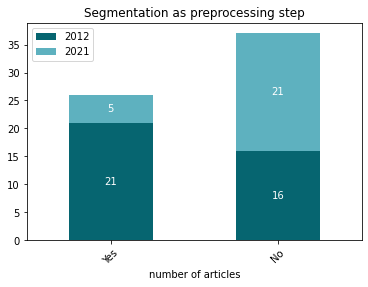

In [160]:
create_viz(df, [], 10, 'Segmentation as preprocessing step', 'y/n')

,2012,2021
Public,7,16
Private,29,8


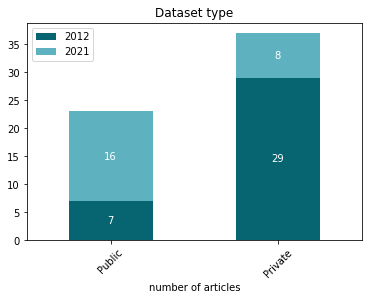

In [161]:
create_viz(df, [], 15, 'Dataset type', 'y/n')

,2012,2021
Yes,18,21
No,19,5


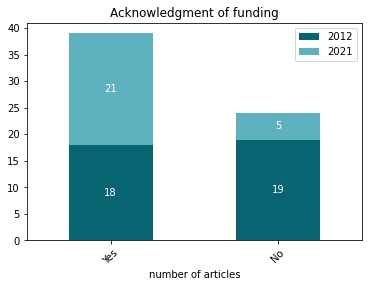

In [162]:
create_viz(df, [], 23, 'Acknowledgment of funding', 'y/n')

,2012,2021
other,21.0,11.0
svm,15.0,NaN
graph analysis,4.0,3.0
unsupervised learning,2.0,NaN
logistic classifier,3.0,NaN
neural network,NaN,22.0


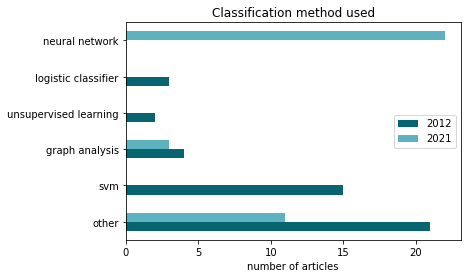

In [163]:
create_viz(df, word_list, 8, 'Classification method used', 'multiple choice')

,2012,2021
other,7.0,8
auc,8.0,14
specificity,8.0,9
accuracy,26.0,13
recall,8.0,4
f1 score,3.0,8
sensitivity,11.0,10
precision,10.0,3
matthews correlation coefficient,NaN,2
balanced accuracy,NaN,2


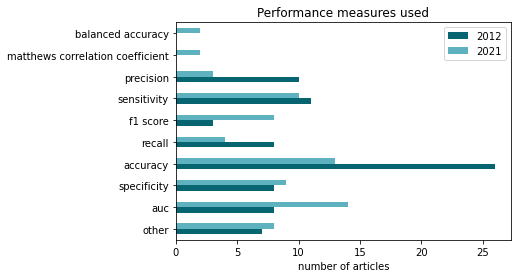

In [164]:
create_viz(df, perf_list, 9, 'Performance measures used', 'multiple choice')

,Respect for persons,Benefience,Justice,Repect for law/public interest
Yes,1,1,0,8
No,36,36,37,29


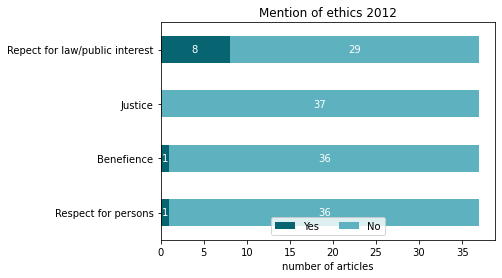

In [128]:
create_ethics_viz(df, ethics_columns, 'barh', 'Mention of ethics 2012', 2012)

,Respect for persons,Benefience,Justice,Repect for law/public interest
Yes,1,2,0,13
No,25,24,26,13


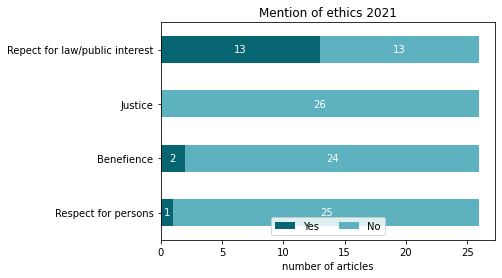

In [129]:
create_ethics_viz(df, ethics_columns, 'barh', 'Mention of ethics 2021', 2021)